<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 

## Week 12 - Semi-supervised Learning, Generative Networks

Last week of uni!
- No more assignments
- **But this is still examinable** (oh no!)

What you are learning today:
- The founding basics of generative models (before Midjourney was cool)
  - GANs
  - Autoencoders
- When data is scarce
  - Active learning
  - Self-training
---

### Project report tips:

Probably not in time now, but may be if you are doing Masters 😄
- It's an art to balance between detailed and conciseness: Include as much details of yours as possible, but remember to keep it short but clear!
- We always look for reasoning: If I mark your report and I have to "hmmmm? Why so?", then you lose marks.
- Visualisation is a good addition to presentation and reasoning.
- Presentations decides a lot on the first impression.
- There is no right, only good arguments (definitely not the Karen style ones).
- Remember to make it readable:
  - If I don't understand, I can assume you did not do it.
  - Best to have a peer reading your report, and see if they understand what you did.

A high standard example? Have a look at IEEE papers!

---
# Theoretical Questions

## 1. What is the connection between deep learning and autoencoders?

- Autoencoders are a specific type of deep learning model used for unsupervised learning
and dimensionality reduction.

Training
- Deep learning models are typically trained using large **labeled datasets through supervised learning**. 
- Autoencoders are usually trained using **unsupervised learning**, meaning **they do not require labeled data**. The training objective of an autoencoder is to minimize the reconstruction error between the input and output. 

Architecture
- **Deep layers**: Deep learning models can have various architectures, often consist of multiple layers that extract hierarchical representations of the input data. 
- **Encoder-Decoder structure**: Autoencoders typically consist of an encoder network that compresses the input data into a lower-dimensional latent space representation, followed by a decoder network that reconstructs the original input from the latent representation. They have a symmetric structure with an equal number of encoder and decoder layers.

## 2. How does the training process of a Generative Adversarial Network (GAN) differ from traditional supervised learning?

The training process of a GAN differs from traditional supervised learning in several key aspects:
- GANs employ unsupervised
learning - unlabeled samples from the target distribution.
- The training of GANs can be framed as a minimax game between the generator and the discriminator. 
- In GANs, we have two separated feedback loops between the generator and the discriminator. 
  - Generator receives feedback from the discriminator's evaluation, guiding it to produce more realistic samples. 
  - Similarly, the discriminator learns from both real and generated samples to improve its ability to distinguish between them. 

The two sections compete and learn from each other to improve the quality of generated samples. The feedback loop in traditional supervised learning models revolves around adjusting the model's parameters to optimize its predictions based on the known target labels
in the training data.
- GANs learn to approximate the data distribution by generating samples that resemble the real data
distribution **bold text** (traditional supervised learning models learn a decision boundary or mapping).
- Adversarial part: GANs involve an adversarial setup between generator and discriminator. This adversarial
competition drives the learning process, with **both components improving iteratively** (the optimization
process in traditional supervised learning is not adversarial in nature. There is no explicit competition between different components or entities within the model).

## 3. Consider a Naive Bayes model trained using the following familiar weather dataset:

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| A  | s    | h    | h    | F    | N    |
| B  | s    | h    | h    | T    | N    |
| C  | o    | h    | h    | F    | Y    |
| D  | r    | m    | h    | F    | Y    |
| E  | r    | c    | n    | F    | Y    |
| F  | r    | c    | n    | T    | N    |

Suppose that you made additional observations (G and H) of days and their features. But you don’t have the label for the PLAY in these days.

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| G  | o    | m    | n    | T    | ?    |
| H  | s    | m    | h    | F    | ?    |

How could you incorporate this information into your Naïve Bayes model without manually annotating the labels? If necessary, recompute your model parameters.

**Answer**
- Assume here Laplace smoothing is used
- Assume we are taking anything with 0.01+ confidence to the gang

Step 1: Do the Naive Bayes


(I'm not productive enough to type the working. Just look back at Question 5 in your Week 3 solution 😁)

- P(N|G) = 0.005
- P(Y|H) = 0.013 ▶ Take that in

Step 2: Do the Naive Bayes again (remember that you need to train again too!)

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| A  | s    | h    | h    | F    | N    |
| B  | s    | h    | h    | T    | N    |
| C  | o    | h    | h    | F    | Y    |
| D  | r    | m    | h    | F    | Y    |
| E  | r    | c    | n    | F    | Y    |
| F  | r    | c    | n    | T    | N    |
| H  | s    | m    | h    | F    | Y    |

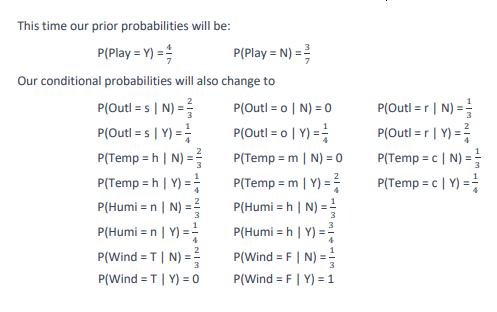

And then:
- P(N|G) = 0.0042
- P(Y|G) = 0.0038

Instance G will still be classified as N with probability of 0.0042 but it doesn’t pass our confidentiality threshold (0.01) and therefor our self-training algorithm stops in this stage.

## 4. What is the main assumption of self-training? What is the main assumption of Active Learning?

The main assumption of self-training is that **similar instances are likely to have the same label**. That’s why we find the most similar instances to our labelled data and if the similarity is certain enough (better than our defined threshold) we will give them the same label and add them to the cluster. 

In Active learning, we assume that instances **near class boundaries are the most informative for learning.** That’s why we find the instances that we are most uncertain about (using different methods such as QBC or Uncertainty Sampling) and send them to the human annotator (Oracle). The assumption here is that having these instances correct label would be most beneficial for forming the correct clusters.

## 5. 
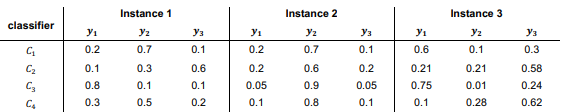

### (a) Describe the rationale and key principles behind the Query-by-Committee algorithm. 

The goal of active learning is to achieve high accuracy with as few queries from the oracle as possible, by selecting the most informative or uncertain examples to query. 

One of the strategies for query sampling is query-by-committee (QBC), where a suite of classifiers is trained over a fixed training set, and the instance that results in the highest disagreement amongst the classifiers, is selected for querying.

The idea is that the models will have different strengths and weaknesses, and by combining their predictions, the algorithm can leverage their collective intelligence. The rationale behind Query-by-Committee is that diversity in the committee is crucial for achieving better accuracy. QBC uses the equation below, which captures vote entropy, to determine the instance that our active learner would select first.

### (b) Use QBC to determine the instance that our active learner would select first in the following scenario.

Step 1: Convert to Vote

Step 2: Count the vote

Step 3: Get the entropy

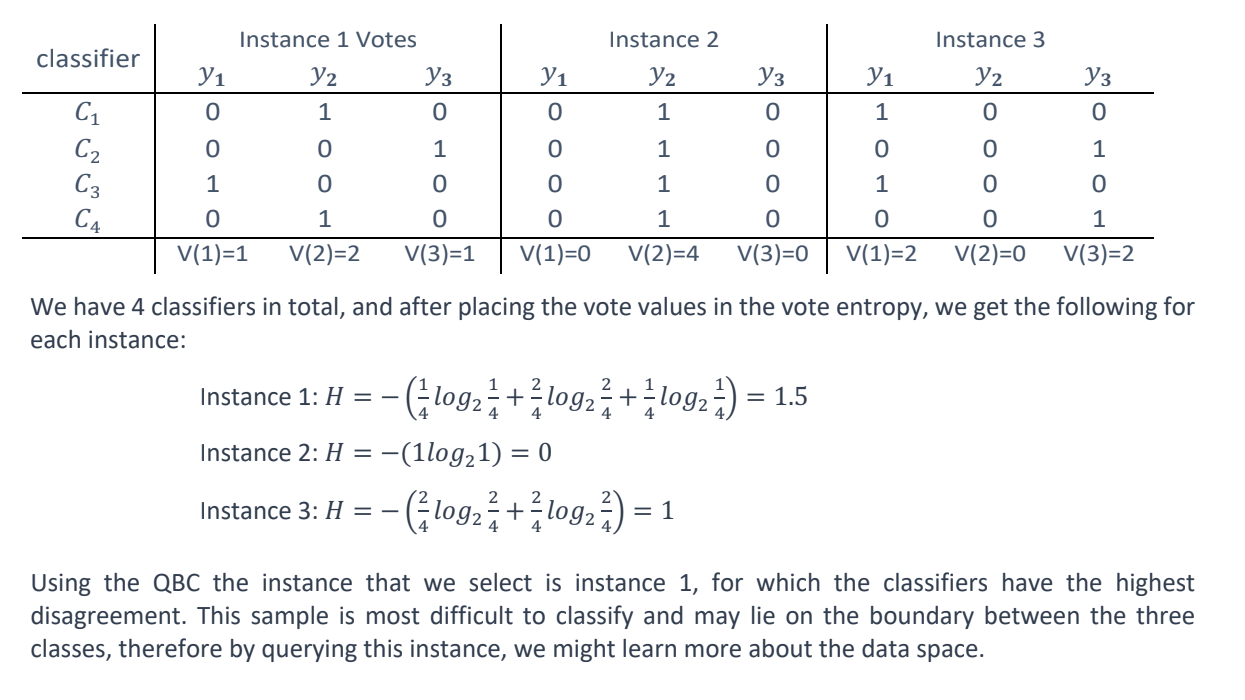

---
# Coding Exercises


![](https://preview.redd.it/xr5m4gkxore41.jpg?auto=webp&s=9a90729f1bf50014b472652b23406e08e607464d)

In [ ]:
import warnings

# Filter and suppress UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In this exercise we are exploring the concept of semi-supervised learning. 

## Self-traning
Self-training is one of the techniques in semi-supervised learning where a model is trained on a small labeled dataset and then used to predict labels for unlabeled data. The model considers predictions with high confidence (determined by a threshold) and adds them to the labeled dataset. This iterative process continues, enlarging the labeled dataset and improving the model's performance. Self-training utilizes unlabeled data to enhance training but relies on the assumption of reliable model predictions. It is a valuable approach when labeled data is scarce, enabling the utilization of larger amounts of unlabeled data.

For this part we are using the `breast_cancer` dataset. To learn more about this datset you can check <a href= "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)"> here </a>. This datset has 569 instances, 30 attributes (all numeric) and 2 classes (212 - Malignant (0), 357 - Benign (1)). 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score

X, y = datasets.load_breast_cancer(return_X_y=True)

print(X.shape)
unique_values, counts = np.unique(y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Bin: {value}, Count: {count}")

(569, 30)
Bin: 0, Count: 212
Bin: 1, Count: 357


To check the power of self-training, we are randomly selecting 50 instance as the labelled instances and remove the label of the rest. 

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=30027)
y_true = y.copy()
y[50:] = -1
total_samples = y.shape[0]

unique_values, counts = np.unique(y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Bin: {value}, Count: {count}")

Bin: -1, Count: 519
Bin: 0, Count: 19
Bin: 1, Count: 31


In our implementation, we will utilize the `SelfTrainingClassifier` from the `sklearn.semi_supervised` library. This model requires a base classifier, which serves as a supervised learner for the labeled data. The base classifier plays a crucial role in identifying the most confident instances during each iteration of the self-training process.

In this example we are using Support Vector Classifier (SVC) from scikit-learn. In this case, the SVC is configured with `probability=True`, enabling it to provide probability estimates for the predicted classes. The default kernel for SVC in scikit-learn is the Radial Basis Function (RBF) kernel. We set the `gamma` parameter and the `random_state`.

In [ ]:
base_classifier = SVC(probability=True, gamma=0.001, random_state=42)


In [ ]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC


In order to examine the behavior of the self-training method with various thresholds, we are conducting an exploration using a range of thresholds. This range encompasses both low thresholds, which accept samples labeled with low confidence, and higher thresholds that require greater confidence for labeling. By evaluating the self-training method across different thresholds, we can gain insights into how the model's performance and behavior vary based on the confidence level used for labeling.

In [ ]:
n_splits = 3

threshold_values = np.arange(0.4, 1.05, 0.05) #generates an array of threshold values ranging from 0.4 to 1.0, with an increment of 0.05. 
threshold_values = np.append(threshold_values, 0.99999) #appends the value 0.99999 to the threshold_values array. 
scores = np.empty((threshold_values.shape[0], n_splits))#creates an empty 2D array. This array will be used to store the accuracy scores for each fold and each threshold value. 
amount_labeled = np.empty((threshold_values.shape[0], n_splits))
amount_iterations = np.empty((threshold_values.shape[0], n_splits))

for i, threshold in enumerate(threshold_values):
    self_training_clf = SelfTrainingClassifier(base_classifier, threshold=threshold)

    # We need manual cross validation so that we don't treat -1 as a separate
    # class when computing accuracy
    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        y_test_true = y_true[test_index]

        self_training_clf.fit(X_train, y_train)

        # The amount of labeled samples that at the end of fitting
        amount_labeled[i, fold] = (
            total_samples
            - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        )
        # The last iteration the classifier labeled a sample in
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        scores[i, fold] = accuracy_score(y_test_true, y_pred)

We will assess the performance of the method through three plots. First, we will examine the change in accuracy by comparing the predicted labels against the true labels. This will provide insights into how well the model improves over iterations. Additionally, we will analyze the number of iterations required for the self-training method to converge, indicating when the model reaches stability. Finally, we will explore the number of labeled samples at the end of fitting for each threshold, offering an understanding of how the threshold affects the amount of labeled data utilized. 

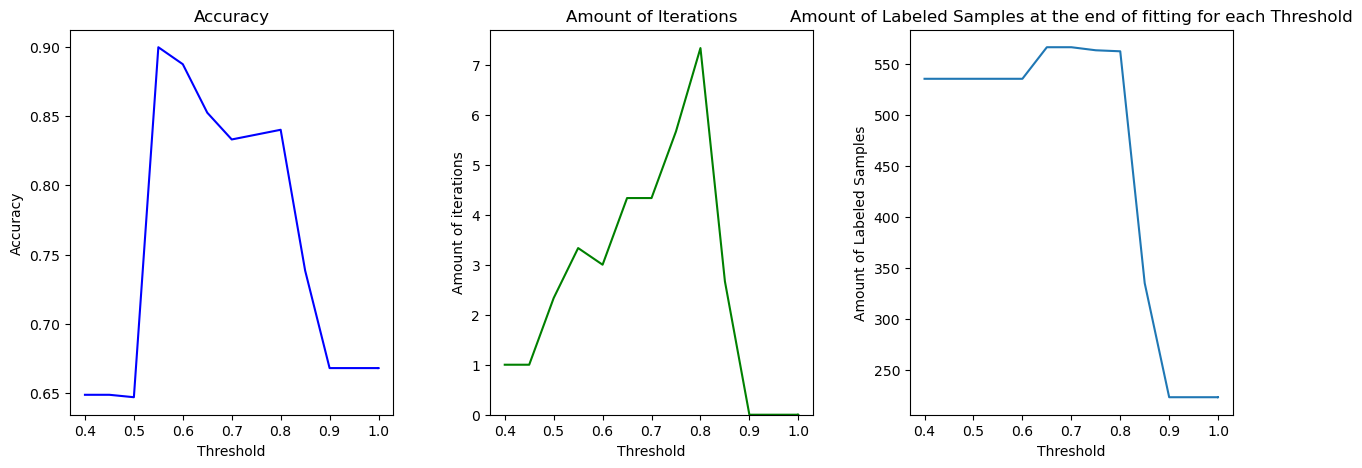

In [ ]:
# Plot 1: Accuracy
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy plot
ax1.plot(threshold_values, scores.mean(axis=1), color="b")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy")

# Amount of iterations plot
ax2.plot(threshold_values, amount_iterations.mean(axis=1), color="g")
ax2.set_ylim(bottom=0)
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Amount of iterations")
ax2.set_title("Amount of Iterations")

# Amount of Labeled Samples plot
avg_amount_labeled = np.mean(amount_labeled, axis=1)
ax3.plot(threshold_values, avg_amount_labeled)
ax3.set_xlabel("Threshold")
ax3.set_ylabel("Amount of Labeled Samples")
ax3.set_title("Amount of Labeled Samples at the end of fitting for each Threshold")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()




### Question 1.
What insights can be gained from the changes in accuracy, number of iterations, and number of labeled samples, regarding the most suitable threshold?

In [ ]:
for i, t in enumerate(threshold_values):
    print("For threshold", round(t,2), "accuracy:", round(scores[i].mean(),2), 
          ",number of iteration:",round(amount_iterations[i].mean(),2),
          ",amount of labeled samples:",round(amount_labeled[i].mean(),2))
    

For threshold 0.4 accuracy: 0.65 ,number of iteration: 1.0 ,amount of labeled samples: 535.67
For threshold 0.45 accuracy: 0.65 ,number of iteration: 1.0 ,amount of labeled samples: 535.67
For threshold 0.5 accuracy: 0.65 ,number of iteration: 2.33 ,amount of labeled samples: 535.67
For threshold 0.55 accuracy: 0.9 ,number of iteration: 3.33 ,amount of labeled samples: 535.67
For threshold 0.6 accuracy: 0.89 ,number of iteration: 3.0 ,amount of labeled samples: 535.67
For threshold 0.65 accuracy: 0.85 ,number of iteration: 4.33 ,amount of labeled samples: 566.67
For threshold 0.7 accuracy: 0.83 ,number of iteration: 4.33 ,amount of labeled samples: 566.67
For threshold 0.75 accuracy: 0.84 ,number of iteration: 5.67 ,amount of labeled samples: 563.67
For threshold 0.8 accuracy: 0.84 ,number of iteration: 7.33 ,amount of labeled samples: 562.67
For threshold 0.85 accuracy: 0.74 ,number of iteration: 2.67 ,amount of labeled samples: 335.0
For threshold 0.9 accuracy: 0.67 ,number of iterat

**Answer**

From the provided information, we can observe the following insights regarding the most suitable threshold:
- Accuracy Stability: The accuracy remains constant at 0.65 for thresholds between 0.4 and 0.45. This indicates that choosing a threshold within this range does not significantly impact the accuracy of the model.
- Accuracy Improvement: As the threshold increases beyond 0.45, the accuracy improves, reaching its highest point at 0.55 with a value of 0.9. This suggests that setting the threshold in this range results in more accurate predictions.
- Number of Iterations: The number of iterations initially increases as the threshold increases, indicating that more iterations are required to converge on a solution when using higher thresholds. However, after reaching a threshold of 0.6, the number of iterations starts to stabilize.
- Amount of Labeled Samples: The amount of labeled samples remains constant at 535.67 until the threshold of 0.55. After that, it increases to 566.67, indicating that higher thresholds result in a larger number of labeled samples.

Based on these insights, a suitable threshold could be around 0.55, as it leads to a higher accuracy while still maintaining a reasonable number of iterations and labeled samples. 

### Exercise 1 .
Change the plots so they show not only the average but the standard devistion of the accuracies for the above example.

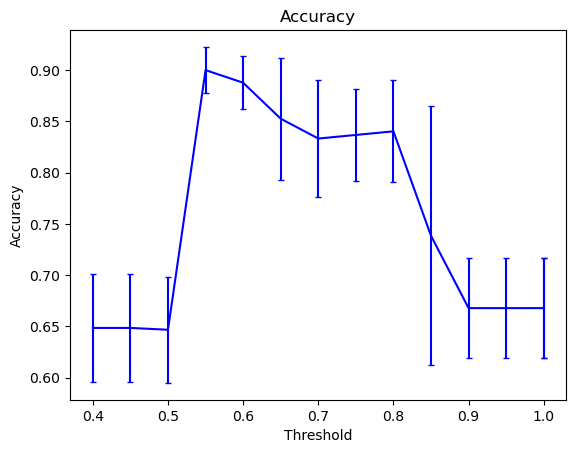

In [ ]:
fig, ax1 = plt.subplots()
ax1.errorbar(threshold_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2,color="b")
ax1.set_ylabel("Accuracy")
ax1.tick_params("y")
plt.xlabel("Threshold")
plt.title("Accuracy")

plt.show()

## Label propagation

Self-training is just one of several techniques in the field of semi-supervised learning. Label propagation is another common method used in semi-supervised learning. Label propagation algorithms aim to propagate labels from labeled data points to unlabeled data points based on the underlying data structure or similarity measures. These algorithms assign labels to unlabeled instances based on the labels of their neighboring instances, effectively leveraging the information from both labeled and unlabeled data. 

For this exercise we are using handwritten digits dataset, you can read further about this dataset <a href= "https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits"> here </a>

The handwritten digit dataset has 1797 total points. The model will be trained using all points, but only 30 will be labeled. 

In [ ]:
digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

print(len(indices))

1797


In [ ]:
X = digits.data[indices]
y = digits.target[indices]
images = digits.images[indices]

Let's check a few of the instances first.

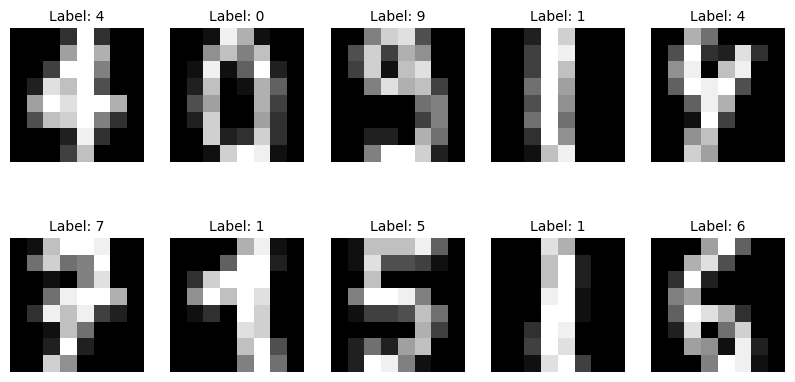

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    image = X[i].reshape(8, 8)  # Reshape the feature vector to the original image shape
    axs[i // 5, i % 5].imshow(image, cmap='gray')
    axs[i // 5, i % 5].axis('off')
    axs[i // 5, i % 5].set_title(f"Label: {y[i]}", fontsize=10)
plt.show()



We select 40 samples with a known label.
Therefore, we store the indices of the rest of the samples for which we are not
supposed to know their labels.

In [ ]:


n_total_samples = len(y)
n_labeled_points = 40

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]
y_train = np.copy(y)
y_train[unlabeled_set] = -1

We fit a :class:`~sklearn.semi_supervised.LabelSpreading` and use it to predict the unknown labels.

In [ ]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report

lp_model = LabelSpreading(gamma=0.25, max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

print(
    "Label Spreading model: %d labeled & %d unlabeled points (%d total)"
    % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
)

Label Spreading model: 40 labeled & 1757 unlabeled points (1797 total)


Let's check the Classification report and the confusion matrix.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       0.81      0.97      0.88       177
           2       0.98      0.93      0.95       175
           3       0.98      0.93      0.95       182
           4       0.97      0.98      0.98       173
           5       0.90      0.96      0.93       176
           6       0.99      1.00      1.00       173
           7       0.98      0.96      0.97       176
           8       0.92      0.80      0.86       173
           9       0.93      0.89      0.91       176

    accuracy                           0.94      1757
   macro avg       0.95      0.94      0.94      1757
weighted avg       0.95      0.94      0.94      1757



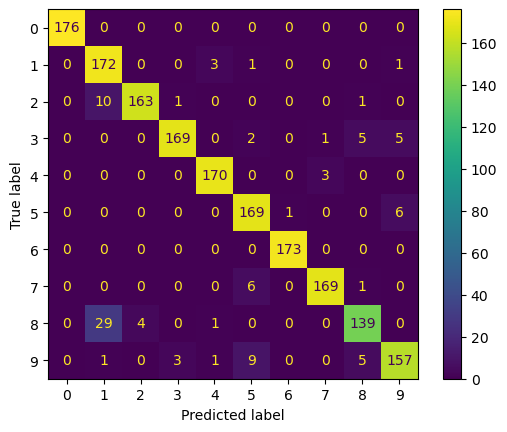

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    true_labels, predicted_labels, labels=lp_model.classes_
)
print(classification_report(true_labels, predicted_labels))

### Exercise 2.
Identify and print the 10 most uncertain predictions in the above example.



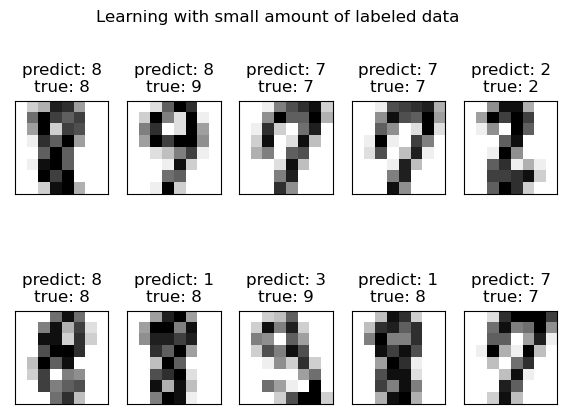

In [ ]:
from scipy import stats

pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

#Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

#Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title(
        "predict: %i\ntrue: %i" % (lp_model.transduction_[image_index], y[image_index])
    )

f.suptitle("Learning with small amount of labeled data")
plt.show()

### Exrecise 3.
Change the above code so we have a range of labelled data from 40 to 60. Check the confusion matrix, accuracy score and the top 5 most uncertain digits for each iteration.

Label Spreading model: 40 labeled & 1757 unlabeled points (1797 total)
Confusion Matrix:
[[176   0   0   0   0   0   0   0   0   0]
 [  0 172   0   0   3   1   0   0   0   1]
 [  0  10 163   1   0   0   0   0   1   0]
 [  0   0   0 169   0   2   0   1   5   5]
 [  0   0   0   0 170   0   0   3   0   0]
 [  0   0   0   0   0 169   1   0   0   6]
 [  0   0   0   0   0   0 173   0   0   0]
 [  0   0   0   0   0   6   0 169   1   0]
 [  0  29   4   0   1   0   0   0 139   0]
 [  0   1   0   3   1   9   0   0   5 157]]
Accuracy Score: 0.94
Top 5 Most Uncertain Digits:


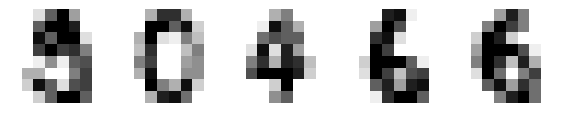

Label Spreading model: 45 labeled & 1752 unlabeled points (1797 total)
Confusion Matrix:
[[176   0   0   0   0   0   0   0   0   0]
 [  0 171   0   0   3   1   0   0   0   2]
 [  0   7 148   1   0   0   0   0  19   0]
 [  0   0   0 169   0   2   0   1   5   5]
 [  0   0   0   0 170   0   0   3   0   0]
 [  0   0   0   0   0 167   1   0   0   7]
 [  0   0   0   0   0   0 173   0   0   0]
 [  0   0   0   0   0   2   0 163   0  10]
 [  0   6   4   0   1   0   0   0 160   0]
 [  0   1   0   2   1   0   0   0   3 168]]
Accuracy Score: 0.95
Top 5 Most Uncertain Digits:


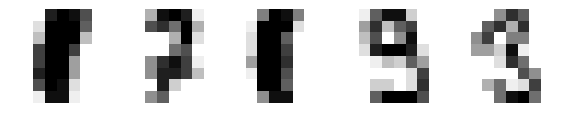

Label Spreading model: 50 labeled & 1747 unlabeled points (1797 total)
Confusion Matrix:
[[176   0   0   0   0   0   0   0   0   0]
 [  0 170   0   0   3   1   0   0   0   2]
 [  0   7 147   6   0   0   1   0  14   0]
 [  0   0   0 171   0   0   0   1   4   5]
 [  0   0   0   0 170   0   0   3   0   0]
 [  0   0   0   0   0 166   1   0   0   8]
 [  0   0   0   0   0   0 171   0   0   0]
 [  0   0   0   0   0   2   0 163   0  10]
 [  0   6   4   8   1   0  10   0 142   0]
 [  0   1   0   1   1   0   1   0   2 168]]
Accuracy Score: 0.94
Top 5 Most Uncertain Digits:


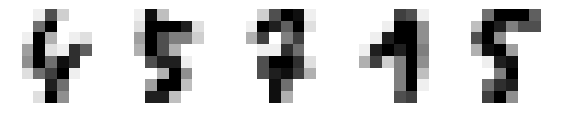

Label Spreading model: 55 labeled & 1742 unlabeled points (1797 total)
Confusion Matrix:
[[175   0   0   0   0   0   0   0   0   0]
 [  0 169   0   0   3   1   0   0   0   2]
 [  0   7 147   6   0   0   1   0  14   0]
 [  0   0   0 174   0   0   0   1   4   1]
 [  0   0   0   0 170   0   0   3   0   0]
 [  0   0   0   0   0 166   1   0   0   8]
 [  0   0   0   0   0   0 171   0   0   0]
 [  0   0   0   0   0   2   0 162   0  10]
 [  0   6   4   9   1   0  10   0 141   0]
 [  0   0   0   3   1   0   1   0   1 167]]
Accuracy Score: 0.94
Top 5 Most Uncertain Digits:


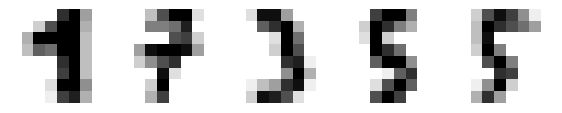

Label Spreading model: 60 labeled & 1737 unlabeled points (1797 total)
Confusion Matrix:
[[175   0   0   0   0   0   0   0   0   0]
 [  0 171   0   0   0   1   0   0   0   1]
 [  0  12 140   6   0   0   1   0  16   0]
 [  0   0   0 174   0   0   0   0   4   1]
 [  0   0   0   0 170   0   0   3   0   0]
 [  0   0   0   0   0 166   1   0   0   8]
 [  0   1   0   0   0   0 170   0   0   0]
 [  0   0   0   0   0   2   0 162   0  10]
 [  0   7   4   7   1   0  10   0 140   0]
 [  0   0   0   3   1   0   1   0   1 167]]
Accuracy Score: 0.94
Top 5 Most Uncertain Digits:


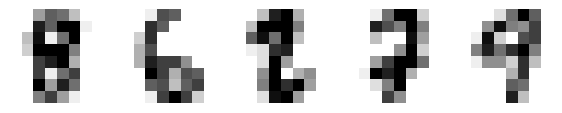

In [ ]:
from sklearn.metrics import confusion_matrix

for n_labels in range(40, 61, 5):
    n_labeled_points = n_labels

    indices = np.arange(n_total_samples)
    unlabeled_set = indices[n_labeled_points:]
    y_train = np.copy(y)
    y_train[unlabeled_set] = -1

    lp_model = LabelSpreading(gamma=0.25, max_iter=20)
    lp_model.fit(X, y_train)
    predicted_labels = lp_model.transduction_[unlabeled_set]
    true_labels = y[unlabeled_set]

    print("Label Spreading model: %d labeled & %d unlabeled points (%d total)"
          % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Confusion Matrix:")
    print(cm)
    
    # Accuracy Score
    accuracy = accuracy_score(true_labels, predicted_labels)
    print("Accuracy Score: %.2f" % accuracy)


    # Uncertainty Calculation
    uncertainties = lp_model.label_distributions_.max(axis=1)
    uncertain_indices = np.argsort(uncertainties)[:5]
    uncertain_images = images[unlabeled_set][uncertain_indices]
    uncertain_true_labels = true_labels[uncertain_indices]
    uncertain_predicted_labels = predicted_labels[uncertain_indices]

    print("Top 5 Most Uncertain Digits:")
    fig, axes = plt.subplots(1, 5, figsize=(7, 3))

    for i in range(5):
        #print("True Label: %d, Predicted Label: %d" % (uncertain_true_labels[i], uncertain_predicted_labels[i]))
        axes[i].imshow(uncertain_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        axes[i].axis('off')

    plt.show()


## Active learning
Active learning is a machine learning approach that selects the most informative instances from a pool of unlabeled data to be labeled by an oracle. The goal is to maximize learning efficiency by actively querying for labels on instances that are challenging or uncertain. This process involves iteratively updating the model by incorporating newly labeled data. Active learning is valuable when labeled data is limited, as it optimizes the use of labeling resources by focusing on the most informative instances for labeling.

In this example we are using the active learning technique to learn handwritten 
using label propagation.
We start by training a label propagation model with only 10 labeled points,
then we select the top five most uncertain points to label. Next, we train
with 15 labeled points (original 10 + 5 new ones). We repeat this process
four times to have a model trained with 30 labeled examples. Note you can
increase this to label more than 30 by changing `max_iterations`. Labeling
more than 30 can be useful to get a sense for the speed of convergence of
this active learning technique.

Iteration 0 ______________________________________________________________________
Label Spreading model: 60 labeled & 1737 unlabeled (1797 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       0.90      0.99      0.94       173
           2       0.97      0.80      0.88       175
           3       0.92      0.97      0.94       179
           4       0.99      0.98      0.99       173
           5       0.98      0.95      0.97       175
           6       0.93      0.99      0.96       171
           7       0.98      0.93      0.96       174
           8       0.87      0.83      0.85       169
           9       0.89      0.97      0.93       173

    accuracy                           0.94      1737
   macro avg       0.94      0.94      0.94      1737
weighted avg       0.94      0.94      0.94      1737

Confusion matrix
[[175   0   0   0   0   0   0   0   0   0]
 [  0 171   0   0   0   1   0   0 

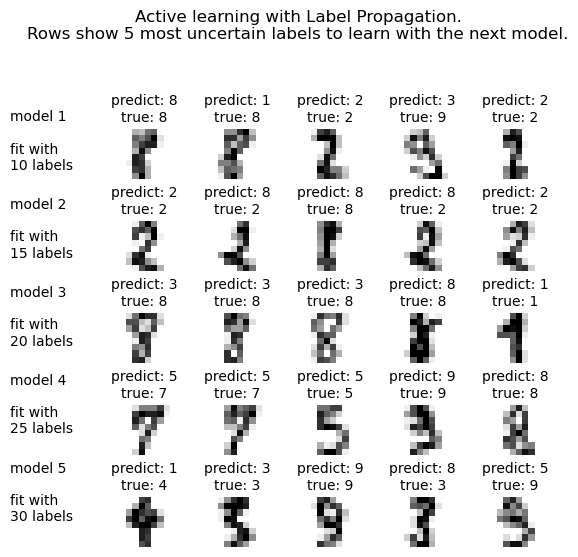

In [ ]:
from scipy import stats
from sklearn.metrics import confusion_matrix

max_iterations = 5

unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
f = plt.figure()

for i in range(max_iterations):
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    y_train[unlabeled_indices] = -1

    lp_model = LabelSpreading(gamma=0.25, max_iter=20)
    lp_model.fit(X, y_train)

    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]

    cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

    print("Iteration %i %s" % (i, 70 * "_"))
    print(
        "Label Spreading model: %d labeled & %d unlabeled (%d total)"
        % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
    )

    print(classification_report(true_labels, predicted_labels))

    print("Confusion matrix")
    print(cm)

    # compute the entropies of transduced label distributions
    pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

    # select up to 5 digit examples that the classifier is most uncertain about
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.in1d(uncertainty_index, unlabeled_indices)
    ][:5]

    # keep track of indices that we get labels for
    delete_indices = np.array([], dtype=int)

    # for more than 5 iterations, visualize the gain only on the first 5
    if i < 5:
        f.text(
            0.05,
            (1 - (i + 1) * 0.183),
            "model %d\n\nfit with\n%d labels" % ((i + 1), i * 5 + 10),
            size=10,
        )
    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]

        # for more than 5 iterations, visualize the gain only on the first 5
        if i < 5:
            sub = f.add_subplot(5, 5, index + 1 + (5 * i))
            sub.imshow(image, cmap=plt.cm.gray_r, interpolation="none")
            sub.set_title(
                "predict: %i\ntrue: %i"
                % (lp_model.transduction_[image_index], y[image_index]),
                size=10,
            )
            sub.axis("off")

        # labeling 5 points, remote from labeled set
        (delete_index,) = np.where(unlabeled_indices == image_index)
        delete_indices = np.concatenate((delete_indices, delete_index))

    unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
    n_labeled_points += len(uncertainty_index)

f.suptitle(
    "Active learning with Label Propagation.\nRows show 5 most "
    "uncertain labels to learn with the next model.",
    y=1.15,
)
plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2, hspace=0.85)
plt.show()

## Autoencoder

An autoencoder is a simple neural network that learns to reconstruct its input at the output. It consists of two parts: an encoder and a decoder. The encoder captures the input's essential features and creates a compressed representation called the latent space. The decoder reconstructs the original input from the latent. By minimizing the difference between the input and output, the autoencoder learns to extract meaningful patterns. It has applications in dimensionality reduction, anomaly detection, and data denoising. An autoencoder is a neural network designed to learn an efficient representation of its input data by attempting to reconstruct it at the output. It falls under the umbrella of unsupervised learning, making it an intriguing component in the field of artificial intelligence.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

For this exercise, we will be working with the MNIST handwritten digits dataset, which is widely used in image processing systems. You can find more information about this dataset <a href= "https://www.kaggle.com/datasets/hojjatk/mnist-dataset"> here </a>. The MNIST database, short for Modified National Institute of Standards and Technology database, contains a vast collection of handwritten digits.



In [ ]:
train_x = np.load('mnist_train_images.npy')
train_y = np.load('mnist_train_labels.npy')
test_x = np.load('mnist_test_images.npy')
test_y = np.load('mnist_test_labels.npy')

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

The number of training images : 16583, shape : (16583, 784)
The number of testing images : 2985, shape : (2985, 784)



In this dataset, each digit is represented by a 28x28 pixel image. These grayscale images showcase the handwritten characters ranging from 0 to 9. The dataset serves as a standard benchmark for evaluating and training various image recognition and classification models. The compact size and labeled nature of the dataset make it highly accessible for researchers and practitioners in the field of machine learning and computer vision.

let's randomly choose and show one instance in this dataset.

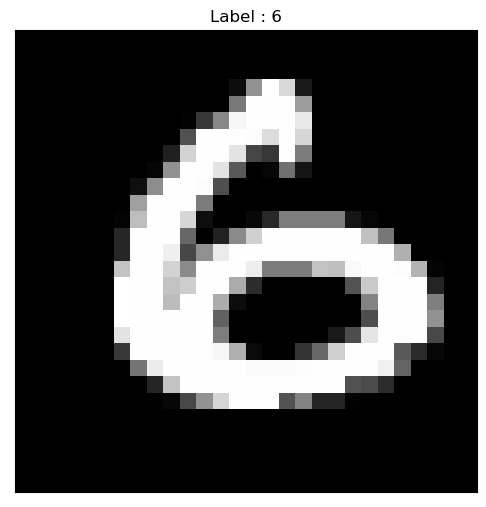

In [ ]:
idx = np.random.randint(train_x.shape[0])
img = train_x[idx].reshape(28,28)

plt.figure(figsize = (6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[idx,:])))
plt.xticks([])
plt.yticks([])
plt.show()

Now we are going to build a simple autoencoder for this dataset. Our auto encoder is going to have two main parts: an *encoder* and a *decoder*.

**Encoder: 3 layers**

    - Input: 28x28 (784) pixel / feature
    - Hidden layer 1: 500 nodes/neurons
    - Hidden layer 2: 300 nodes/neurons
    - Encoder output/Latent: 2 nodes

**Decoder: 3 layers**

    - Decoder input/Latent: 2 nodes
    - Hidden layer 2: 300 nodes/neurons
    - Hidden layer 1: 500 nodes/neurons
    - Decoder output: 28x28 (784) pixel / feature

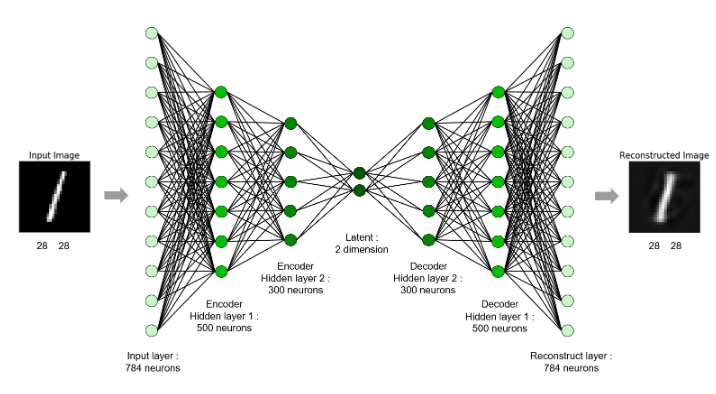

In [ ]:
from IPython import display
display.Image("autoencoder.png")

In [ ]:
# Shape of input and latent variable

n_input = 28*28

# Encoder structure
n_encoder1 = 500
n_encoder2 = 300

n_latent = 2

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500

**Encoder**

- Simple ANN (MLP) model
- Use *tanh* for a nonlinear activation function
- *latent* is not applied with a nonlinear activation function
- *adam* as the optimizer (AdamOptimizer is the most popular optimizer)

**Decoder**

- Simple ANN (MLP) model
- Use *tanh* for a nonlinear activation function
- *reconst* is not applied with a nonlinear activation function
- *adam* as the optimizer

In [ ]:
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                   activation = 'tanh', 
                   solver = 'adam', 
                   learning_rate_init = 0.0001, 
                   max_iter = 20, 
                   tol = 0.0000001, 
                   verbose = True)

In [ ]:
reg.fit(train_x, train_x)


Iteration 1, loss = 0.03337108
Iteration 2, loss = 0.02391367
Iteration 3, loss = 0.02276241
Iteration 4, loss = 0.02253162
Iteration 5, loss = 0.02239531
Iteration 6, loss = 0.02225409
Iteration 7, loss = 0.02214188
Iteration 8, loss = 0.02208825
Iteration 9, loss = 0.02206327
Iteration 10, loss = 0.02205164
Iteration 11, loss = 0.02204364
Iteration 12, loss = 0.02203773
Iteration 13, loss = 0.02203497
Iteration 14, loss = 0.02202861
Iteration 15, loss = 0.02202473
Iteration 16, loss = 0.02201952
Iteration 17, loss = 0.02201109
Iteration 18, loss = 0.02199840
Iteration 19, loss = 0.02197775
Iteration 20, loss = 0.02192892


MLPRegressor(activation='tanh', hidden_layer_sizes=(500, 300, 2, 300, 500),
             learning_rate_init=0.0001, max_iter=20, tol=1e-07, verbose=True)

Now we are going to test reconstruction performance of the autoencoder


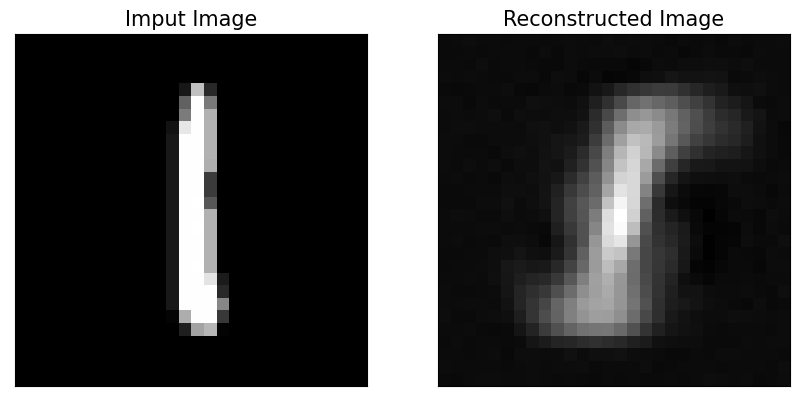

In [ ]:
idx = np.random.randint(test_x.shape[0])
x_reconst = reg.predict(test_x[idx].reshape(-1,784))

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(test_x[idx].reshape(28,28), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

Another way to check the performance of the autoencoder is to check the distribution of latent variables. The latent variables represent the compressed and abstract representation of the input data captured by the encoder. By analyzing the distribution of these latent variables, we can gain insights into how well the autoencoder is learning and representing the underlying structure of the data.

Examining the distribution of latent variables can help identify potential issues such as mode collapse or inadequate capturing of important features. It allows us to assess if the autoencoder is effectively capturing the desired patterns and if the latent space is well-structured and sufficiently diverse.

Various techniques can be used to visualize and analyze the distribution of latent variables, here we are using the scatter plots the latent space using the 2 dimensions of the latent (Z1 and Z2). This visualization can provide valuable insights into the quality of the learned representations and aid in identifying areas for improvement or further exploration in the autoencoder model.


In [ ]:
def encoder(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)

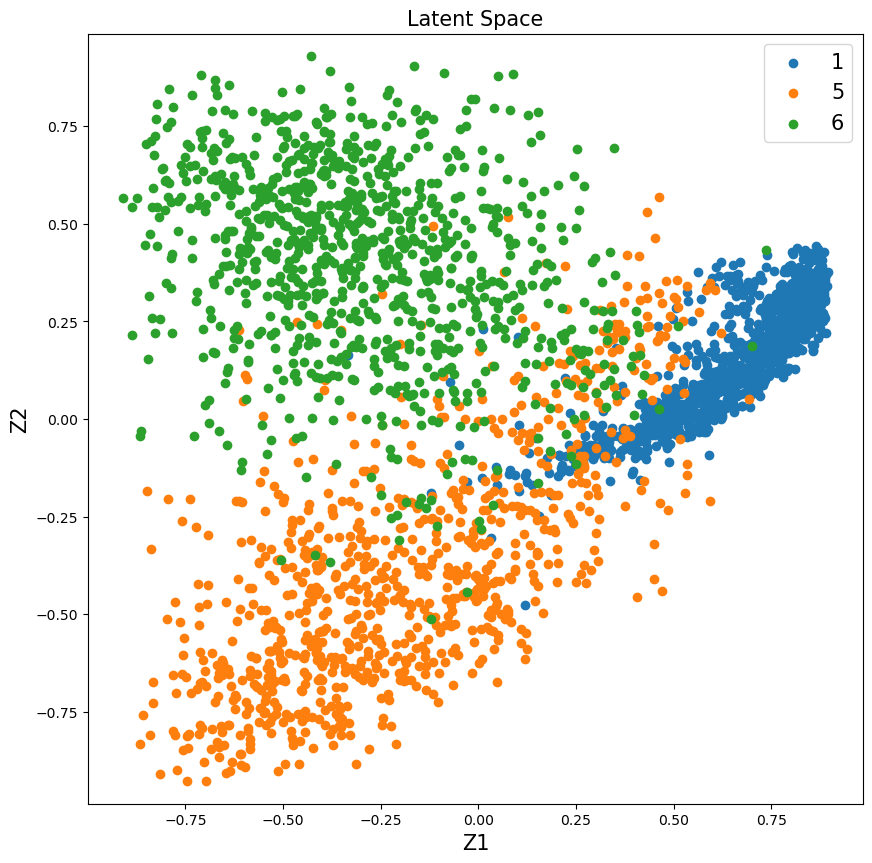

In [ ]:
test_latent = encoder(test_x)

plt.figure(figsize = (10,10))
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 1,0], test_latent[np.argmax(test_y, axis = 1) == 1,1], label = '1')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 5,0], test_latent[np.argmax(test_y, axis = 1) == 5,1], label = '5')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 6,0], test_latent[np.argmax(test_y, axis = 1) == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

In [ ]:
def decoder(new_data):
    new_data = np.asmatrix(new_data)
    decoder2 = new_data*reg.coefs_[3] + reg.intercepts_[3]
    decoder2 = (np.exp(decoder2) - np.exp(-decoder2))/(np.exp(decoder2) + np.exp(-decoder2))

    decoder1 = decoder2*reg.coefs_[4] + reg.intercepts_[4]
    decoder1 = (np.exp(decoder1) - np.exp(-decoder1))/(np.exp(decoder1) + np.exp(-decoder1))

    reconst = decoder1*reg.coefs_[5] + reg.intercepts_[5]
    reconst = (np.exp(reconst) - np.exp(-reconst))/(np.exp(reconst) + np.exp(-reconst))

    return np.asarray(reconst)

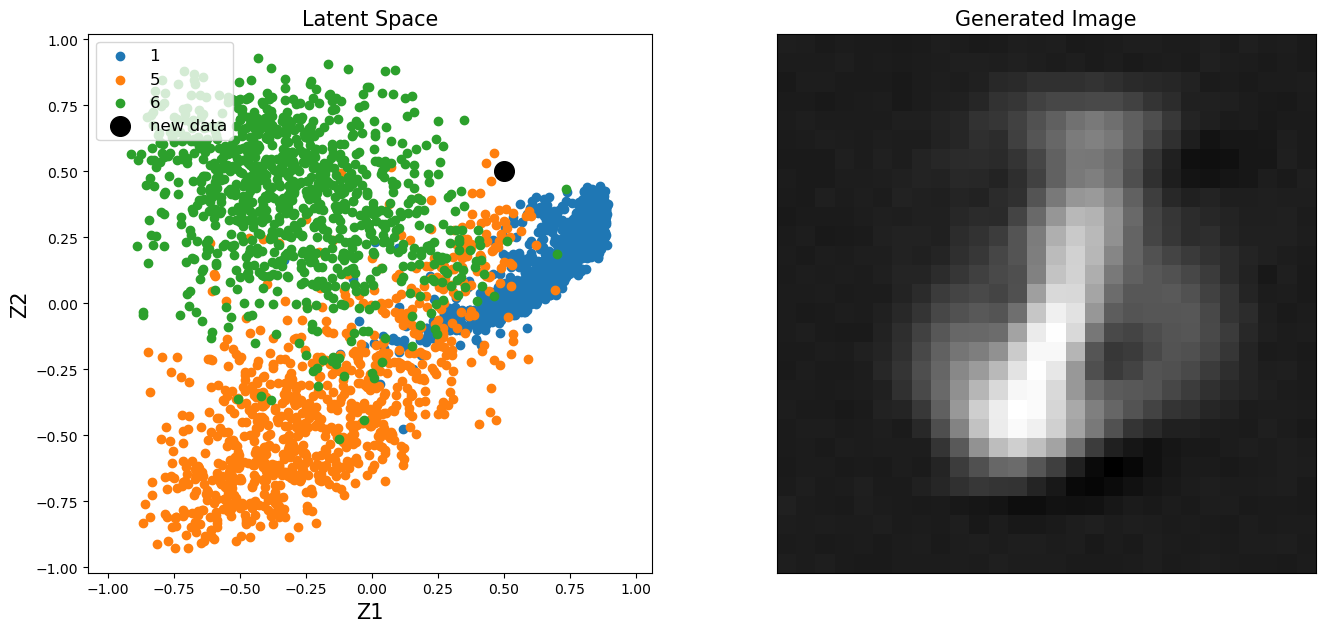

In [ ]:
latent = np.array([[0.5, 0.5]])
reconst = decoder(latent)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 1,0], test_latent[np.argmax(test_y, axis = 1) == 1,1], label = '1')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 5,0], test_latent[np.argmax(test_y, axis = 1) == 5,1], label = '5')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 6,0], test_latent[np.argmax(test_y, axis = 1) == 6,1], label = '6')
plt.scatter(latent[:,0], latent[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(reconst.reshape(28,28), 'gray')
plt.title('Generated Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

---

# End of sem!!!!

What to be proud of:
- The knowledge you know today would be really helpful when applying for ML positions
- If not, you can flex your knowledge and T-pose on people referring to everything as 'AI'
- Have a siiickk tutor (Jk). Thank you for tolerating me throughout the weeks!

If you can give me feedbacks and suggestions, I would be really appreciated as well!

## For the exam:
- Don't try to aim for 100%, aim to do as best as you can (you can thank me later, this applies to almost every UniMelb exam). Be strategic!
- No coding, theoretical questions will be asked. Some examples:
  - What happens when you change parameter `x` when doing `xxx` method?
  - Why do we need to do `y` when doing `yyy`?
  - Does `aaa` variation of `bbb` method works on `ccc` type of images? Why?
  - What is the term `ggg` representing in this equation?
  - True/False stuffs
- Some mathy questions (like stuffs you have done in the tutes):
  - Model training steps (Naive Bayes, Logistic Regression, Perceptron)
  - Metrics (Chi2, Gain Ratio, Purity)
  - And probably more (but no stuffs like 'proof that derivative of `kkk` is equal to sum squared of `lll`' though)
- Design/open-ended question:
  - What model would be suitable for this?
  - How would you set up your datasets?
  - A method to handle these types of problem?
- In case you need revision, I stored the notebook solutions here: https://github.com/tuankhoin/COMP30027-Practical-Solutions/tree/main/2023 . Give it a star ⭐ to make me look cool on GitHub 👌!

For now, get on the beers 🍺. After the exams, get on another beer 🍺! Good luck everyone! May your next journeys have more joy and less (UniMelb) pain.

